In [20]:
# ----- Packages -----
import pandas as pd 
import os
from collections import defaultdict


from goatools.obo_parser import GODag
from goatools.gosubdag.gosubdag import GoSubDag
from goatools.anno.gaf_reader import GafReader


In [21]:
# Vamos a leer el gaf así para mantener las relaciones de interes
# Diccionario para almacenar anotaciones GO
gene_annotations = defaultdict(set)

# Leer el archivo GAF
with open(r"C:\Users\masoz\Desktop\TesisMaestria\Supervisado\Analisis_interseccion\wb.gaf") as gaf_file:
    for line in gaf_file:
        if line.startswith("!"):  # Ignorar comentarios
            continue
        fields = line.strip().split("\t")
        gene_id = fields[1]  # ID del gen
        go_term = fields[4]  # Término GO
        qualifier = fields[3]  # Relación (e.g., enables, involved_in, located_in)
        
        # Incluir todas las relaciones, incluyendo located_in
        if qualifier in {"located_in", "enables", "involved_in"}:
            gene_annotations[gene_id].add(go_term)

In [7]:
ns2assc = ogaf.get_ns2assc()
godag = GODag("go-basic.obo",
              optional_attrs={'relationship'})


**WARNING: NO VERSION LINE FOUND IN GAF FILE. USING:
!gaf-version: 2.2


ERROR:root:Failed to validate header as GAF v2.2:
[]


HMS:0:00:02.129469 133,336 annotations READ: wb.gaf 
go-basic.obo: fmt(1.2) rel(2024-01-17) 45,869 Terms; optional_attrs(relationship)


In [10]:
interseccion_df = pd.read_csv(r"..\Archivos\Genes_predichos\interseccion_todos_entrez.csv",
                             sep=',')

interseccion = list(interseccion_df['wbps_gene_id'])
interseccion_names = list(interseccion_df['gene_name'])

In [11]:
# Creamos un nuevo diccionario para almacenar los valores
nuevo_diccionario = {}

# Iteramos sobre cada clave en ns2assc
for clave, dic_genes in ns2assc.items():
    # Iteramos sobre cada gen en el diccionario de genes
    for gen, valor in dic_genes.items():
        # Verificamos si el gen está en la lista de genes
        if gen in interseccion:
            # Sumamos el valor al valor existente en nuevo_diccionario[gen], si el gen ya está en el diccionario
            if gen in nuevo_diccionario:
                nuevo_diccionario[gen] += list(valor)
            else:
                # Si el gen no está en el diccionario, almacenamos el valor como está
                nuevo_diccionario[gen] = list(valor)



In [13]:
# Agregarle los ancestros
# Función para obtener los ancestros de un término GO
def obtener_ancestros(GO_ID, godag):
    gosubdag_r0 = GoSubDag([GO_ID], godag)
    return gosubdag_r0.rcntobj.go2ancestors.get(GO_ID, [])

# Diccionario para almacenar genes y sus ancestros GO sin duplicados
nuevo_diccionario = {}

# Recorrer el diccionario ns2assc
for ontologia, genes in ns2assc.items():
    for gen, terminos_go in genes.items():
        if gen in interseccion:
            ancestros = set()
            # Recorrer cada término GO del gen
            for termino_go in terminos_go:
                # Obtener ancestros del término GO
                ancestros.add(termino_go)
                ancestros.update(obtener_ancestros(termino_go, godag))
            # Verificar si el gen ya está en nuevo_diccionario
            if gen in nuevo_diccionario:
                # Extender la lista de ancestros con los nuevos ancestros
                nuevo_diccionario[gen].extend(list(ancestros))
            else:
                # Si el gen no está en nuevo_diccionario, agregarlo con sus ancestros
                nuevo_diccionario[gen] = list(ancestros)


 GoSubDag:   1 sources in   4 GOs rcnt(True). 0 alt GO IDs
 GoSubDag: namedtuple fields: NS level depth GO alt GO_name dcnt D1 id
 GoSubDag: relationships: set()
 GoSubDag:   1 sources in   3 GOs rcnt(True). 0 alt GO IDs
 GoSubDag: namedtuple fields: NS level depth GO alt GO_name dcnt D1 id
 GoSubDag: relationships: set()
 GoSubDag:   1 sources in   7 GOs rcnt(True). 0 alt GO IDs
 GoSubDag: namedtuple fields: NS level depth GO alt GO_name dcnt D1 id
 GoSubDag: relationships: set()
 GoSubDag:   1 sources in   3 GOs rcnt(True). 0 alt GO IDs
 GoSubDag: namedtuple fields: NS level depth GO alt GO_name dcnt D1 id
 GoSubDag: relationships: set()
 GoSubDag:   1 sources in   7 GOs rcnt(True). 0 alt GO IDs
 GoSubDag: namedtuple fields: NS level depth GO alt GO_name dcnt D1 id
 GoSubDag: relationships: set()
 GoSubDag:   1 sources in   4 GOs rcnt(True). 0 alt GO IDs
 GoSubDag: namedtuple fields: NS level depth GO alt GO_name dcnt D1 id
 GoSubDag: relationships: set()
 GoSubDag:   1 sources in   

 GoSubDag:   1 sources in   5 GOs rcnt(True). 0 alt GO IDs
 GoSubDag: namedtuple fields: NS level depth GO alt GO_name dcnt D1 id
 GoSubDag: relationships: set()
 GoSubDag:   1 sources in   3 GOs rcnt(True). 0 alt GO IDs
 GoSubDag: namedtuple fields: NS level depth GO alt GO_name dcnt D1 id
 GoSubDag: relationships: set()
 GoSubDag:   1 sources in   4 GOs rcnt(True). 0 alt GO IDs
 GoSubDag: namedtuple fields: NS level depth GO alt GO_name dcnt D1 id
 GoSubDag: relationships: set()
 GoSubDag:   1 sources in   5 GOs rcnt(True). 0 alt GO IDs
 GoSubDag: namedtuple fields: NS level depth GO alt GO_name dcnt D1 id
 GoSubDag: relationships: set()
 GoSubDag:   1 sources in   7 GOs rcnt(True). 0 alt GO IDs
 GoSubDag: namedtuple fields: NS level depth GO alt GO_name dcnt D1 id
 GoSubDag: relationships: set()
 GoSubDag:   1 sources in   4 GOs rcnt(True). 0 alt GO IDs
 GoSubDag: namedtuple fields: NS level depth GO alt GO_name dcnt D1 id
 GoSubDag: relationships: set()
 GoSubDag:   1 sources in   

 GoSubDag:   1 sources in   3 GOs rcnt(True). 0 alt GO IDs
 GoSubDag: namedtuple fields: NS level depth GO alt GO_name dcnt D1 id
 GoSubDag: relationships: set()
 GoSubDag:   1 sources in   6 GOs rcnt(True). 0 alt GO IDs
 GoSubDag: namedtuple fields: NS level depth GO alt GO_name dcnt D1 id
 GoSubDag: relationships: set()
 GoSubDag:   1 sources in   7 GOs rcnt(True). 0 alt GO IDs
 GoSubDag: namedtuple fields: NS level depth GO alt GO_name dcnt D1 id
 GoSubDag: relationships: set()
 GoSubDag:   1 sources in   3 GOs rcnt(True). 0 alt GO IDs
 GoSubDag: namedtuple fields: NS level depth GO alt GO_name dcnt D1 id
 GoSubDag: relationships: set()
 GoSubDag:   1 sources in   6 GOs rcnt(True). 0 alt GO IDs
 GoSubDag: namedtuple fields: NS level depth GO alt GO_name dcnt D1 id
 GoSubDag: relationships: set()
1 GO IDs NOT FOUND IN GO DAG: GO:0042788
 GoSubDag:   0 sources in   0 GOs rcnt(True). 0 alt GO IDs
 GoSubDag: namedtuple fields: NS level depth GO alt GO_name dcnt D1 id
 GoSubDag: relation

 GoSubDag:   1 sources in   8 GOs rcnt(True). 0 alt GO IDs
 GoSubDag: namedtuple fields: NS level depth GO alt GO_name dcnt D1 id
 GoSubDag: relationships: set()
 GoSubDag:   1 sources in   8 GOs rcnt(True). 0 alt GO IDs
 GoSubDag: namedtuple fields: NS level depth GO alt GO_name dcnt D1 id
 GoSubDag: relationships: set()
 GoSubDag:   1 sources in  10 GOs rcnt(True). 0 alt GO IDs
 GoSubDag: namedtuple fields: NS level depth GO alt GO_name dcnt D1 id
 GoSubDag: relationships: set()
 GoSubDag:   1 sources in   8 GOs rcnt(True). 0 alt GO IDs
 GoSubDag: namedtuple fields: NS level depth GO alt GO_name dcnt D1 id
 GoSubDag: relationships: set()
 GoSubDag:   1 sources in   8 GOs rcnt(True). 0 alt GO IDs
 GoSubDag: namedtuple fields: NS level depth GO alt GO_name dcnt D1 id
 GoSubDag: relationships: set()
 GoSubDag:   1 sources in   7 GOs rcnt(True). 0 alt GO IDs
 GoSubDag: namedtuple fields: NS level depth GO alt GO_name dcnt D1 id
 GoSubDag: relationships: set()
 GoSubDag:   1 sources in   

 GoSubDag:   1 sources in   5 GOs rcnt(True). 0 alt GO IDs
 GoSubDag: namedtuple fields: NS level depth GO alt GO_name dcnt D1 id
 GoSubDag: relationships: set()
 GoSubDag:   1 sources in   5 GOs rcnt(True). 0 alt GO IDs
 GoSubDag: namedtuple fields: NS level depth GO alt GO_name dcnt D1 id
 GoSubDag: relationships: set()
 GoSubDag:   1 sources in   6 GOs rcnt(True). 0 alt GO IDs
 GoSubDag: namedtuple fields: NS level depth GO alt GO_name dcnt D1 id
 GoSubDag: relationships: set()
 GoSubDag:   1 sources in   4 GOs rcnt(True). 0 alt GO IDs
 GoSubDag: namedtuple fields: NS level depth GO alt GO_name dcnt D1 id
 GoSubDag: relationships: set()
 GoSubDag:   1 sources in   3 GOs rcnt(True). 0 alt GO IDs
 GoSubDag: namedtuple fields: NS level depth GO alt GO_name dcnt D1 id
 GoSubDag: relationships: set()
 GoSubDag:   1 sources in   8 GOs rcnt(True). 0 alt GO IDs
 GoSubDag: namedtuple fields: NS level depth GO alt GO_name dcnt D1 id
 GoSubDag: relationships: set()
 GoSubDag:   1 sources in   

 GoSubDag:   1 sources in   3 GOs rcnt(True). 0 alt GO IDs
 GoSubDag: namedtuple fields: NS level depth GO alt GO_name dcnt D1 id
 GoSubDag: relationships: set()
 GoSubDag:   1 sources in   7 GOs rcnt(True). 0 alt GO IDs
 GoSubDag: namedtuple fields: NS level depth GO alt GO_name dcnt D1 id
 GoSubDag: relationships: set()
 GoSubDag:   1 sources in   7 GOs rcnt(True). 0 alt GO IDs
 GoSubDag: namedtuple fields: NS level depth GO alt GO_name dcnt D1 id
 GoSubDag: relationships: set()
 GoSubDag:   1 sources in   3 GOs rcnt(True). 0 alt GO IDs
 GoSubDag: namedtuple fields: NS level depth GO alt GO_name dcnt D1 id
 GoSubDag: relationships: set()
 GoSubDag:   1 sources in   7 GOs rcnt(True). 0 alt GO IDs
 GoSubDag: namedtuple fields: NS level depth GO alt GO_name dcnt D1 id
 GoSubDag: relationships: set()
 GoSubDag:   1 sources in   8 GOs rcnt(True). 0 alt GO IDs
 GoSubDag: namedtuple fields: NS level depth GO alt GO_name dcnt D1 id
 GoSubDag: relationships: set()
 GoSubDag:   1 sources in   

 GoSubDag:   1 sources in   3 GOs rcnt(True). 0 alt GO IDs
 GoSubDag: namedtuple fields: NS level depth GO alt GO_name dcnt D1 id
 GoSubDag: relationships: set()
 GoSubDag:   1 sources in   7 GOs rcnt(True). 0 alt GO IDs
 GoSubDag: namedtuple fields: NS level depth GO alt GO_name dcnt D1 id
 GoSubDag: relationships: set()
 GoSubDag:   1 sources in   7 GOs rcnt(True). 0 alt GO IDs
 GoSubDag: namedtuple fields: NS level depth GO alt GO_name dcnt D1 id
 GoSubDag: relationships: set()
 GoSubDag:   1 sources in  10 GOs rcnt(True). 0 alt GO IDs
 GoSubDag: namedtuple fields: NS level depth GO alt GO_name dcnt D1 id
 GoSubDag: relationships: set()
 GoSubDag:   1 sources in   7 GOs rcnt(True). 0 alt GO IDs
 GoSubDag: namedtuple fields: NS level depth GO alt GO_name dcnt D1 id
 GoSubDag: relationships: set()
 GoSubDag:   1 sources in   6 GOs rcnt(True). 0 alt GO IDs
 GoSubDag: namedtuple fields: NS level depth GO alt GO_name dcnt D1 id
 GoSubDag: relationships: set()
 GoSubDag:   1 sources in  1

 GoSubDag:   1 sources in   3 GOs rcnt(True). 0 alt GO IDs
 GoSubDag: namedtuple fields: NS level depth GO alt GO_name dcnt D1 id
 GoSubDag: relationships: set()
 GoSubDag:   1 sources in  30 GOs rcnt(True). 0 alt GO IDs
 GoSubDag: namedtuple fields: NS level depth GO alt GO_name dcnt D1 id
 GoSubDag: relationships: set()
1 GO IDs NOT FOUND IN GO DAG: GO:1990258
 GoSubDag:   0 sources in   0 GOs rcnt(True). 0 alt GO IDs
 GoSubDag: namedtuple fields: NS level depth GO alt GO_name dcnt D1 id
 GoSubDag: relationships: set()
 GoSubDag:   1 sources in  27 GOs rcnt(True). 0 alt GO IDs
 GoSubDag: namedtuple fields: NS level depth GO alt GO_name dcnt D1 id
 GoSubDag: relationships: set()
 GoSubDag:   1 sources in   9 GOs rcnt(True). 0 alt GO IDs
 GoSubDag: namedtuple fields: NS level depth GO alt GO_name dcnt D1 id
 GoSubDag: relationships: set()
 GoSubDag:   1 sources in   8 GOs rcnt(True). 0 alt GO IDs
 GoSubDag: namedtuple fields: NS level depth GO alt GO_name dcnt D1 id
 GoSubDag: relation

 GoSubDag:   1 sources in  13 GOs rcnt(True). 0 alt GO IDs
 GoSubDag: namedtuple fields: NS level depth GO alt GO_name dcnt D1 id
 GoSubDag: relationships: set()
 GoSubDag:   1 sources in   3 GOs rcnt(True). 0 alt GO IDs
 GoSubDag: namedtuple fields: NS level depth GO alt GO_name dcnt D1 id
 GoSubDag: relationships: set()
 GoSubDag:   1 sources in   7 GOs rcnt(True). 0 alt GO IDs
 GoSubDag: namedtuple fields: NS level depth GO alt GO_name dcnt D1 id
 GoSubDag: relationships: set()
 GoSubDag:   1 sources in  10 GOs rcnt(True). 0 alt GO IDs
 GoSubDag: namedtuple fields: NS level depth GO alt GO_name dcnt D1 id
 GoSubDag: relationships: set()
 GoSubDag:   1 sources in  18 GOs rcnt(True). 0 alt GO IDs
 GoSubDag: namedtuple fields: NS level depth GO alt GO_name dcnt D1 id
 GoSubDag: relationships: set()
 GoSubDag:   1 sources in   4 GOs rcnt(True). 0 alt GO IDs
 GoSubDag: namedtuple fields: NS level depth GO alt GO_name dcnt D1 id
 GoSubDag: relationships: set()
 GoSubDag:   1 sources in  1

 GoSubDag:   1 sources in   6 GOs rcnt(True). 0 alt GO IDs
 GoSubDag: namedtuple fields: NS level depth GO alt GO_name dcnt D1 id
 GoSubDag: relationships: set()
 GoSubDag:   1 sources in  32 GOs rcnt(True). 0 alt GO IDs
 GoSubDag: namedtuple fields: NS level depth GO alt GO_name dcnt D1 id
 GoSubDag: relationships: set()
 GoSubDag:   1 sources in   6 GOs rcnt(True). 0 alt GO IDs
 GoSubDag: namedtuple fields: NS level depth GO alt GO_name dcnt D1 id
 GoSubDag: relationships: set()
 GoSubDag:   1 sources in   4 GOs rcnt(True). 0 alt GO IDs
 GoSubDag: namedtuple fields: NS level depth GO alt GO_name dcnt D1 id
 GoSubDag: relationships: set()
 GoSubDag:   1 sources in   5 GOs rcnt(True). 0 alt GO IDs
 GoSubDag: namedtuple fields: NS level depth GO alt GO_name dcnt D1 id
 GoSubDag: relationships: set()
 GoSubDag:   1 sources in   5 GOs rcnt(True). 0 alt GO IDs
 GoSubDag: namedtuple fields: NS level depth GO alt GO_name dcnt D1 id
 GoSubDag: relationships: set()
 GoSubDag:   1 sources in   

 GoSubDag:   1 sources in   5 GOs rcnt(True). 0 alt GO IDs
 GoSubDag: namedtuple fields: NS level depth GO alt GO_name dcnt D1 id
 GoSubDag: relationships: set()
 GoSubDag:   1 sources in  15 GOs rcnt(True). 0 alt GO IDs
 GoSubDag: namedtuple fields: NS level depth GO alt GO_name dcnt D1 id
 GoSubDag: relationships: set()
 GoSubDag:   1 sources in  14 GOs rcnt(True). 0 alt GO IDs
 GoSubDag: namedtuple fields: NS level depth GO alt GO_name dcnt D1 id
 GoSubDag: relationships: set()
 GoSubDag:   1 sources in   4 GOs rcnt(True). 0 alt GO IDs
 GoSubDag: namedtuple fields: NS level depth GO alt GO_name dcnt D1 id
 GoSubDag: relationships: set()
 GoSubDag:   1 sources in  26 GOs rcnt(True). 0 alt GO IDs
 GoSubDag: namedtuple fields: NS level depth GO alt GO_name dcnt D1 id
 GoSubDag: relationships: set()
 GoSubDag:   1 sources in  18 GOs rcnt(True). 0 alt GO IDs
 GoSubDag: namedtuple fields: NS level depth GO alt GO_name dcnt D1 id
 GoSubDag: relationships: set()
 GoSubDag:   1 sources in  2

 GoSubDag:   1 sources in   3 GOs rcnt(True). 0 alt GO IDs
 GoSubDag: namedtuple fields: NS level depth GO alt GO_name dcnt D1 id
 GoSubDag: relationships: set()
 GoSubDag:   1 sources in  10 GOs rcnt(True). 0 alt GO IDs
 GoSubDag: namedtuple fields: NS level depth GO alt GO_name dcnt D1 id
 GoSubDag: relationships: set()
 GoSubDag:   1 sources in  23 GOs rcnt(True). 0 alt GO IDs
 GoSubDag: namedtuple fields: NS level depth GO alt GO_name dcnt D1 id
 GoSubDag: relationships: set()
 GoSubDag:   1 sources in   6 GOs rcnt(True). 0 alt GO IDs
 GoSubDag: namedtuple fields: NS level depth GO alt GO_name dcnt D1 id
 GoSubDag: relationships: set()
 GoSubDag:   1 sources in  27 GOs rcnt(True). 0 alt GO IDs
 GoSubDag: namedtuple fields: NS level depth GO alt GO_name dcnt D1 id
 GoSubDag: relationships: set()
 GoSubDag:   1 sources in   8 GOs rcnt(True). 0 alt GO IDs
 GoSubDag: namedtuple fields: NS level depth GO alt GO_name dcnt D1 id
 GoSubDag: relationships: set()
 GoSubDag:   1 sources in  1

 GoSubDag:   1 sources in  17 GOs rcnt(True). 0 alt GO IDs
 GoSubDag: namedtuple fields: NS level depth GO alt GO_name dcnt D1 id
 GoSubDag: relationships: set()
 GoSubDag:   1 sources in  16 GOs rcnt(True). 0 alt GO IDs
 GoSubDag: namedtuple fields: NS level depth GO alt GO_name dcnt D1 id
 GoSubDag: relationships: set()
 GoSubDag:   1 sources in   8 GOs rcnt(True). 0 alt GO IDs
 GoSubDag: namedtuple fields: NS level depth GO alt GO_name dcnt D1 id
 GoSubDag: relationships: set()
 GoSubDag:   1 sources in  16 GOs rcnt(True). 0 alt GO IDs
 GoSubDag: namedtuple fields: NS level depth GO alt GO_name dcnt D1 id
 GoSubDag: relationships: set()
 GoSubDag:   1 sources in   8 GOs rcnt(True). 0 alt GO IDs
 GoSubDag: namedtuple fields: NS level depth GO alt GO_name dcnt D1 id
 GoSubDag: relationships: set()
 GoSubDag:   1 sources in   7 GOs rcnt(True). 0 alt GO IDs
 GoSubDag: namedtuple fields: NS level depth GO alt GO_name dcnt D1 id
 GoSubDag: relationships: set()
 GoSubDag:   1 sources in   

 GoSubDag:   1 sources in   3 GOs rcnt(True). 0 alt GO IDs
 GoSubDag: namedtuple fields: NS level depth GO alt GO_name dcnt D1 id
 GoSubDag: relationships: set()
 GoSubDag:   1 sources in   3 GOs rcnt(True). 0 alt GO IDs
 GoSubDag: namedtuple fields: NS level depth GO alt GO_name dcnt D1 id
 GoSubDag: relationships: set()
 GoSubDag:   1 sources in   8 GOs rcnt(True). 0 alt GO IDs
 GoSubDag: namedtuple fields: NS level depth GO alt GO_name dcnt D1 id
 GoSubDag: relationships: set()
 GoSubDag:   1 sources in  17 GOs rcnt(True). 0 alt GO IDs
 GoSubDag: namedtuple fields: NS level depth GO alt GO_name dcnt D1 id
 GoSubDag: relationships: set()
 GoSubDag:   1 sources in   9 GOs rcnt(True). 0 alt GO IDs
 GoSubDag: namedtuple fields: NS level depth GO alt GO_name dcnt D1 id
 GoSubDag: relationships: set()
 GoSubDag:   1 sources in   5 GOs rcnt(True). 0 alt GO IDs
 GoSubDag: namedtuple fields: NS level depth GO alt GO_name dcnt D1 id
 GoSubDag: relationships: set()
 GoSubDag:   1 sources in   

 GoSubDag:   1 sources in   8 GOs rcnt(True). 0 alt GO IDs
 GoSubDag: namedtuple fields: NS level depth GO alt GO_name dcnt D1 id
 GoSubDag: relationships: set()
 GoSubDag:   1 sources in  17 GOs rcnt(True). 0 alt GO IDs
 GoSubDag: namedtuple fields: NS level depth GO alt GO_name dcnt D1 id
 GoSubDag: relationships: set()
 GoSubDag:   1 sources in  17 GOs rcnt(True). 0 alt GO IDs
 GoSubDag: namedtuple fields: NS level depth GO alt GO_name dcnt D1 id
 GoSubDag: relationships: set()
 GoSubDag:   1 sources in  17 GOs rcnt(True). 0 alt GO IDs
 GoSubDag: namedtuple fields: NS level depth GO alt GO_name dcnt D1 id
 GoSubDag: relationships: set()
 GoSubDag:   1 sources in   8 GOs rcnt(True). 0 alt GO IDs
 GoSubDag: namedtuple fields: NS level depth GO alt GO_name dcnt D1 id
 GoSubDag: relationships: set()
 GoSubDag:   1 sources in   7 GOs rcnt(True). 0 alt GO IDs
 GoSubDag: namedtuple fields: NS level depth GO alt GO_name dcnt D1 id
 GoSubDag: relationships: set()
 GoSubDag:   1 sources in   

 GoSubDag:   1 sources in   6 GOs rcnt(True). 0 alt GO IDs
 GoSubDag: namedtuple fields: NS level depth GO alt GO_name dcnt D1 id
 GoSubDag: relationships: set()
 GoSubDag:   1 sources in  17 GOs rcnt(True). 0 alt GO IDs
 GoSubDag: namedtuple fields: NS level depth GO alt GO_name dcnt D1 id
 GoSubDag: relationships: set()
 GoSubDag:   1 sources in   8 GOs rcnt(True). 0 alt GO IDs
 GoSubDag: namedtuple fields: NS level depth GO alt GO_name dcnt D1 id
 GoSubDag: relationships: set()
 GoSubDag:   1 sources in  17 GOs rcnt(True). 0 alt GO IDs
 GoSubDag: namedtuple fields: NS level depth GO alt GO_name dcnt D1 id
 GoSubDag: relationships: set()
 GoSubDag:   1 sources in   6 GOs rcnt(True). 0 alt GO IDs
 GoSubDag: namedtuple fields: NS level depth GO alt GO_name dcnt D1 id
 GoSubDag: relationships: set()
 GoSubDag:   1 sources in   8 GOs rcnt(True). 0 alt GO IDs
 GoSubDag: namedtuple fields: NS level depth GO alt GO_name dcnt D1 id
 GoSubDag: relationships: set()
 GoSubDag:   1 sources in  1

 GoSubDag:   1 sources in   6 GOs rcnt(True). 0 alt GO IDs
 GoSubDag: namedtuple fields: NS level depth GO alt GO_name dcnt D1 id
 GoSubDag: relationships: set()
 GoSubDag:   1 sources in   4 GOs rcnt(True). 0 alt GO IDs
 GoSubDag: namedtuple fields: NS level depth GO alt GO_name dcnt D1 id
 GoSubDag: relationships: set()
 GoSubDag:   1 sources in   6 GOs rcnt(True). 0 alt GO IDs
 GoSubDag: namedtuple fields: NS level depth GO alt GO_name dcnt D1 id
 GoSubDag: relationships: set()
 GoSubDag:   1 sources in  17 GOs rcnt(True). 0 alt GO IDs
 GoSubDag: namedtuple fields: NS level depth GO alt GO_name dcnt D1 id
 GoSubDag: relationships: set()
 GoSubDag:   1 sources in   4 GOs rcnt(True). 0 alt GO IDs
 GoSubDag: namedtuple fields: NS level depth GO alt GO_name dcnt D1 id
 GoSubDag: relationships: set()
 GoSubDag:   1 sources in   4 GOs rcnt(True). 0 alt GO IDs
 GoSubDag: namedtuple fields: NS level depth GO alt GO_name dcnt D1 id
 GoSubDag: relationships: set()
 GoSubDag:   1 sources in   

In [ ]:
# IDs que deseas excluir
exclude_ids = {"GO:0009058", "GO:0043170", "GO:0044238"}
# Filtrar los términos excluyendo los no deseados
filtered_ids = [go_id for go_id in children_ids if go_id not in exclude_ids]

In [14]:
dic = {'Mitocondria': ['GO:0005739'],
      'Citoplasma': ['GO:0005737'],
      'Nucleo': ['GO:0005634'],
      'Membrana': ['GO:0016020'],
      'Retículo endoplasmático': ['GO:0005783'],
      'Metabolismo' : ['GO:0008152'],
      'Procesos metabólicos\n del RNA': ['GO:0016070'],
      'Traducción': ['GO:0006412','GO:0006417', 'GO:0017148','GO:0045727'],
      'Otro': []}

In [16]:
genes_of_interest = interseccion 

In [24]:
# Filtrar las anotaciones GO para solo incluir los genes de interés
# filtered_annotations = {gene: annotations for gene, annotations in gene_annotations.items() if gene in genes_of_interest}
filtered_annotations = {gene: gene_annotations.get(gene, {}) for gene in genes_of_interest}

# Crear un diccionario para almacenar los descendientes de los términos GO
descendants = {category: set() for category in dic}
for category, go_terms in dic.items():
    for term in go_terms:
        if isinstance(term, str) and term in godag:
            descendants[category].add(term)
            # Obtener los descendientes del término
            descendants[category].update(godag[term].get_all_children())
        elif isinstance(term, set):
            # Si ya es un conjunto (como list_met), simplemente lo asignamos
            descendants[category].update(term)

# Depuración: Imprimir descendientes de cada categoría
for category, go_set in descendants.items():
    print(f"Categoría: {category}, Número de términos GO: {len(go_set)}")

# Remover términos de RNA y Traducción de la categoría Metabolismo
descendants['Metabolismo'] -= (descendants['Procesos metabólicos\n del RNA'] | descendants['Traducción'])

# Depuración: Imprimir el número de términos en Metabolismo después de la exclusión
print(f"Metabolismo filtrado: {len(descendants['Metabolismo'])} términos")

# Crear la tabla
genes = list(filtered_annotations.keys())  # Ahora solo los genes de interés
categories = list(dic.keys())

Categoría: Mitocondria, Número de términos GO: 1
Categoría: Citoplasma, Número de términos GO: 29
Categoría: Nucleo, Número de términos GO: 20
Categoría: Membrana, Número de términos GO: 216
Categoría: Retículo endoplasmático, Número de términos GO: 6
Categoría: Metabolismo, Número de términos GO: 5839
Categoría: Procesos metabólicos
 del RNA, Número de términos GO: 458
Categoría: Traducción, Número de términos GO: 127
Categoría: Otro, Número de términos GO: 0
Metabolismo filtrado: 5365 términos


In [120]:
len(filtered_annotations)

103

In [25]:
# Inicializar la tabla binaria
table = pd.DataFrame(0, index=genes, columns=categories)

In [27]:
# Rellenar la tabla
for gene, annotations in filtered_annotations.items():
    # Anotaciones ya son un conjunto de términos GO
    for GO in annotations: 
        encontrado = False
        i = 1
        for category, go_set in descendants.items():
            if GO in go_set:
                table.loc[gene, category] = i
                encontrado = True
            else:
                pass
            i +=1
        if not encontrado:
            i -= 1
            table.loc[gene, 'Otro'] = i

In [28]:
table

,Mitocondria,Citoplasma,Nucleo,Membrana,Retículo endoplasmático,Metabolismo,Procesos metabólicos\n del RNA,Traducción,Otro
WBGene00000063,0,2,0,0,0,0,0,0,9
WBGene00000182,0,0,0,0,5,0,0,0,9
WBGene00000183,0,0,0,0,0,0,0,0,9
WBGene00000209,1,0,0,4,0,6,0,0,9
WBGene00000210,1,0,0,4,0,6,0,0,9
...,...,...,...,...,...,...,...,...,...
WBGene00021960,0,2,0,4,0,6,0,0,0
WBGene00022114,0,2,0,0,0,0,0,0,0
WBGene00022122,0,0,0,4,5,0,0,0,0
WBGene00022599,0,0,0,0,0,0,0,0,9


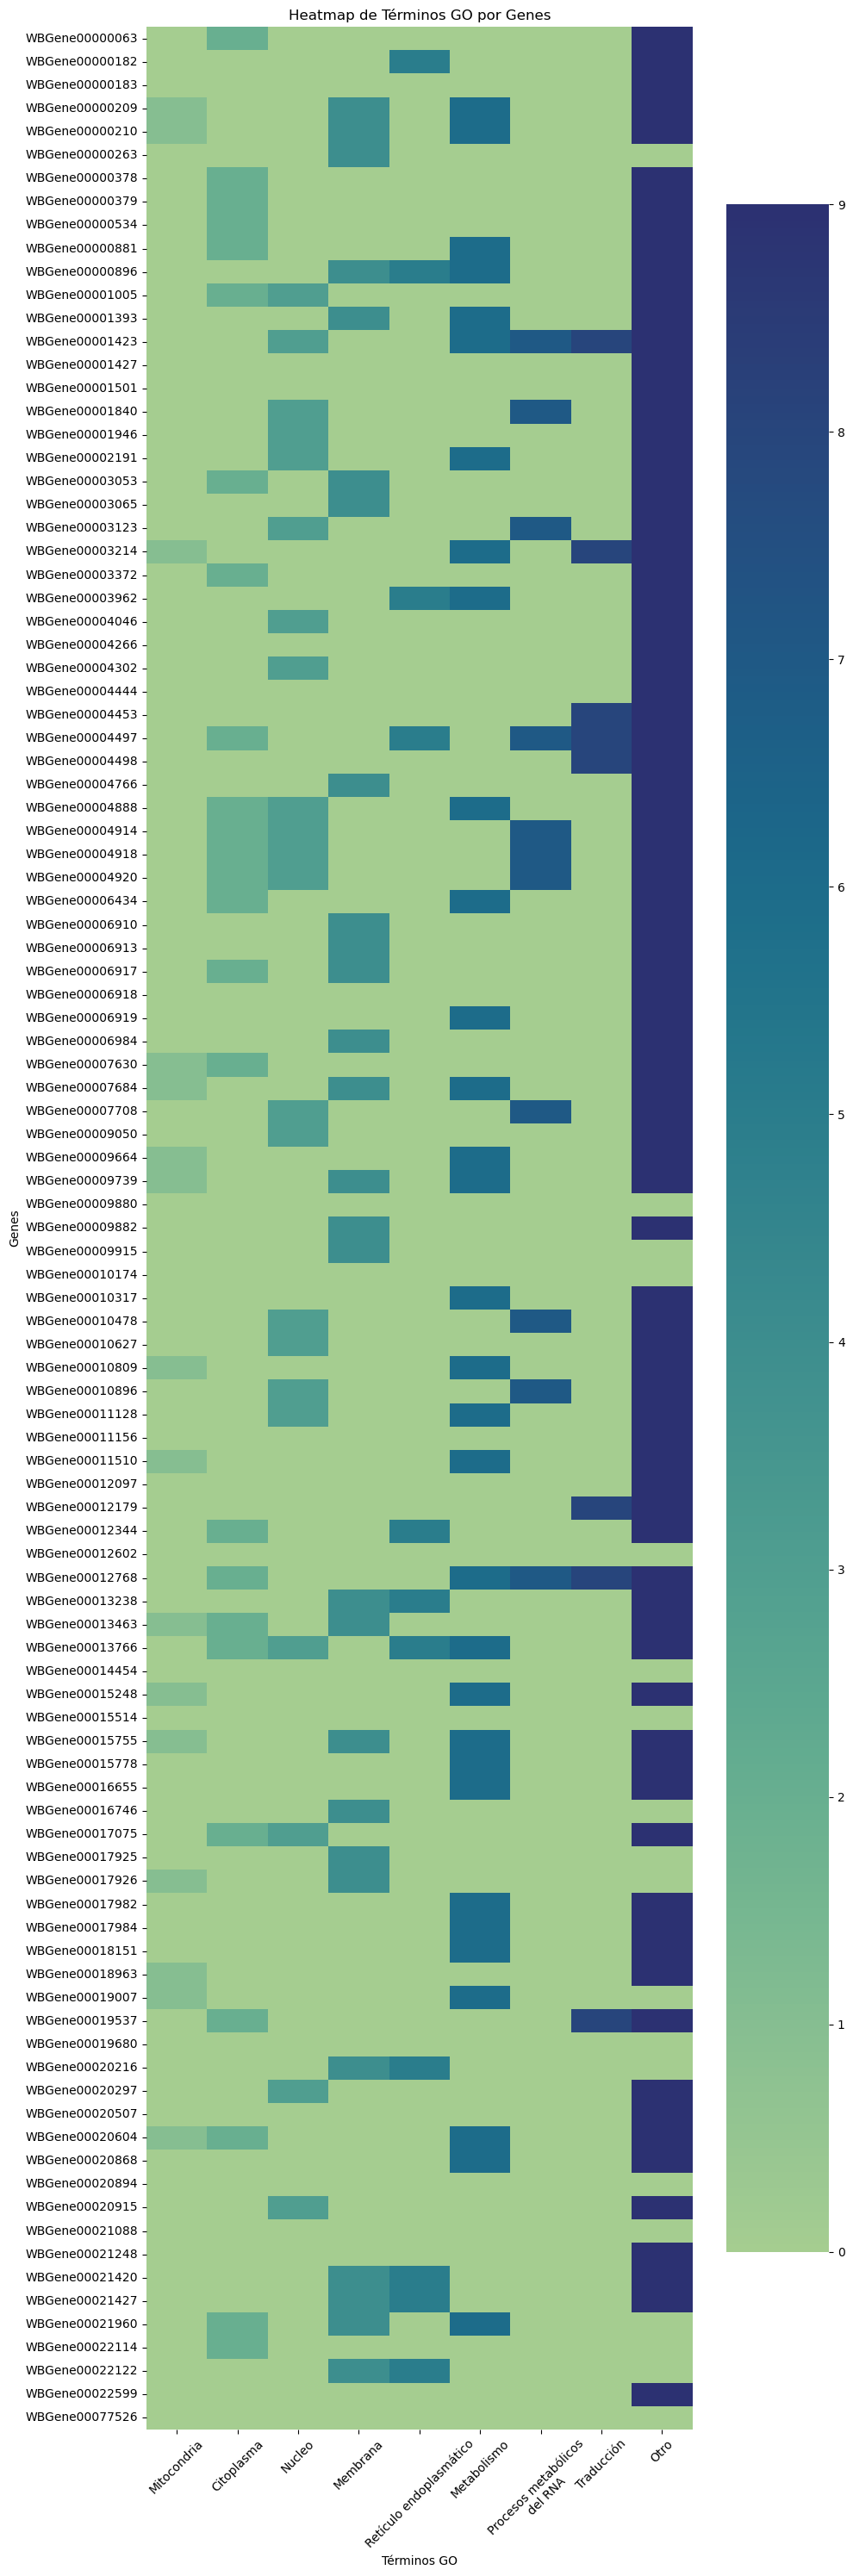

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el heatmap
plt.figure(figsize=(10, 30))
sns.heatmap(table, annot=False,cmap="crest")
plt.title("Heatmap de Términos GO por Genes")
plt.xlabel("Términos GO")
plt.ylabel("Genes")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


La tabla 'table' que se genera se utiliza para luego realizar el tilesplot circular en script_tilesplot.R

In [32]:
# table.to_csv(r'..\Archivos\Genes_predichos\tabla_para_tilesplot.csv')